In [18]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
y = np.random.normal(size=30).reshape(30, 1)
x = np.array(range(1, 31)).reshape(30, 1)
coord = np.concatenate((x, y), axis=1)

<AxesSubplot:>

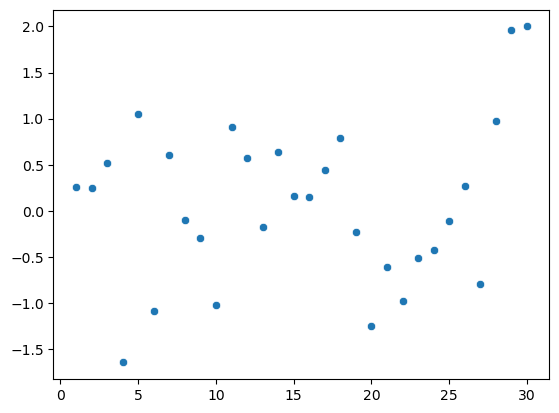

In [33]:
sns.scatterplot(x=x.reshape(1, 30)[0], y=y.reshape(1, 30)[0])

In [43]:
k = int(input('Выберите число кластеров: '))

Выберите число кластеров: 3


In [44]:
centroids = []
for i in range(k):
    centroids.append(coord[random.randrange(coord.shape[0])])

while True:
    cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(k):
            a = ((coord[i][0] - centroids[j][0]) ** 2 + (coord[i][1] - centroids[j][1])) ** 0.5
            d[a] = j
            c = d[min(d)]
        cluster.append(c)
    df = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
    
    new_centroids = []
    for i in range(k):
        data = df[df['cluster'] == i]
        new_centroids.append(np.array([data['x'].mean(), data['y'].mean()]))
    
    new_cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(k):
            a = ((coord[i][0] - new_centroids[j][0]) ** 2 + (coord[i][1] - new_centroids[j][1])) ** 0.5
            d[a] = j
            c = d[min(d)]
        new_cluster.append(c)
    
    if cluster == new_cluster:
        break
    
    centroids = new_centroids

C:\Users\Win10\AppData\Local\Temp\ipykernel_15980\1313122701.py:25: RuntimeWarning: invalid value encountered in double_scalars
  a = ((coord[i][0] - new_centroids[j][0]) ** 2 + (coord[i][1] - new_centroids[j][1])) ** 0.5
C:\Users\Win10\AppData\Local\Temp\ipykernel_15980\1313122701.py:10: RuntimeWarning: invalid value encountered in double_scalars
  a = ((coord[i][0] - centroids[j][0]) ** 2 + (coord[i][1] - centroids[j][1])) ** 0.5


In [45]:
new_df = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
new_df

,x,y,cluster
0,1.0,0.260428,2
1,2.0,0.253547,2
2,3.0,0.517322,2
3,4.0,-1.642199,2
4,5.0,1.047089,2
5,6.0,-1.081321,1
6,7.0,0.608539,2
7,8.0,-0.093113,2
8,9.0,-0.293941,2
9,10.0,-1.020031,1


In [46]:
colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'pink', 'black']

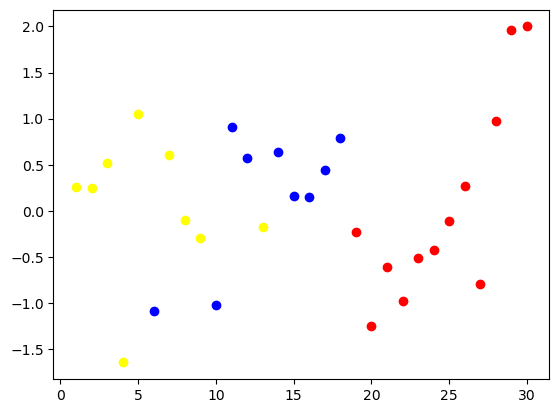

In [47]:
for i in range(k):
    plt.scatter(data=new_df[new_df['cluster'] == i], x='x', y='y', color=colors[i])